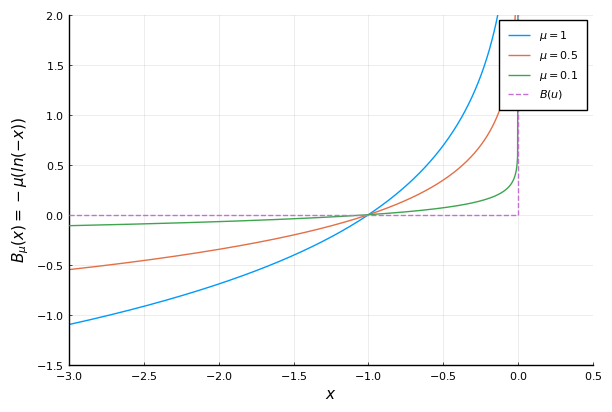

In [1]:
#Ex. 1 - Lecture 9

using Plots, LaTeXStrings
pyplot()

n=1000


f(x) = -log.(-x) 
x = range(-3,-1e-10,length=n);

plot(x, f(x),
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-4,4)),
    #aspect_ratio = :equal
    label = L"$\mu = 1$"
    )        
 
plot!(x, 0.5*f(x), 
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-1,2)),
    label = L"$\mu = 0.5$"
    )

plot!(x, 0.1*f(x), 
    xaxis = (L"$x$",(-3,0.5)),
    yaxis = (L"$B_\mu(x) = -\mu (ln(-x))$", (-1.5,2)),
    #aspect_ratio = :equal,
    label = L"$\mu = 0.1$"
)

plot!([x;0], [zeros(length(x));4], line = :dash, label = L"$B(u)$")

savefig("different_mu.pdf")



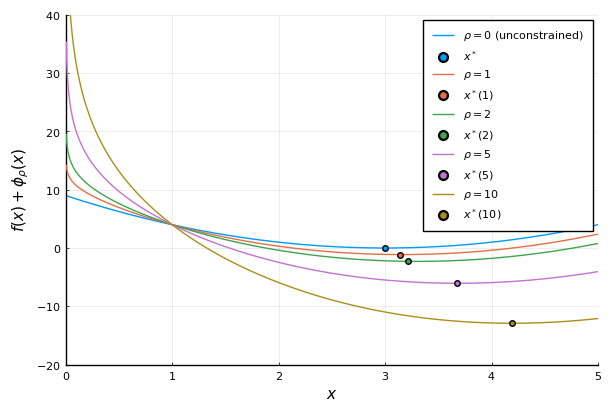

In [2]:
f(x,ρ) = (x.-3).^2 .- ρ*log.(x)

n=1000
x = range(0,stop=5,length=n);


plot(x, f(x,0),
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-4,4)),
    #aspect_ratio = :equal
    label = L"$\rho = 0$ (unconstrained)",
    color = :1) 
scatter!([3],[f(3,0)], color=:1, label=L"$x^*$")

plot!(x, f(x,1),
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-4,4)),
    #aspect_ratio = :equal
    label = L"$\rho = 1$",
    color = :2)        
scatter!([3.1433891376616736],[f(3.1433891376616736,1)], color=:2, label = L"$x^*(1)$" )

plot!(x, f(x,2), 
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-1,2)),
    label = L"$\rho = 2$",
    color = :3)
scatter!([3.2152148101218567],[f(3.2152148101218567,2)], color=:3, label = L"$x^*(2)$")


plot!(x, f(x,5), 
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-1,2)),
    label = L"$\rho = 5$",
    color=:4
    )
scatter!([3.670541174987388],[f(3.670541174987388,5)], color=:4, label = L"$x^*(5)$")

plot!(x, f(x,10), 
    xaxis = (L"$x$",(0,5)),
    yaxis = (L"$f(x) + \phi_\rho(x)$", (-20,40)),
    #aspect_ratio = :equal
    label = L"$\rho = 10$",
    color=:5
)
scatter!([4.192207845473914],[f(4.192207845473914,10)], color=:5, label = L"$x^*(10)$")

savefig("ex1-barrier.pdf")


In [3]:
using Ipopt, JuMP

function NLopt(ρ::Float64)

    m = Model(with_optimizer(Ipopt.Optimizer))

    @variable(m, x >= 0)
    @NLobjective(m, Min, (x+1)^2 - ρ*log(x))


    optimize!(m)

    return value(x)
end



NLopt (generic function with 1 method)

In [4]:
NLopt(1.0)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        1
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

0.36430206830870004

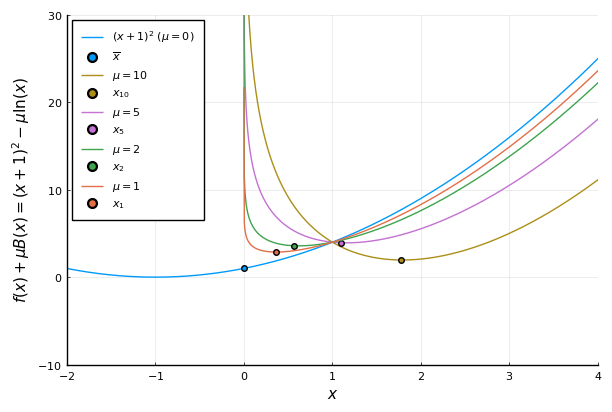

In [11]:
f(x) = (x.+1).^2 #.- ρ*log.(x)

n=1000
x = range(-5,stop=5,length=n);

plot(x, f(x),
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-4,4)),
    #aspect_ratio = :equal
    label = L"(x+1)^2 ~ (\mu = 0)",
    color = :1,
    legend= :topleft
    ) 
scatter!([0],[f(0)], color=:1, label=L"$\overline{x}$")

x = range(1e-9, stop=5, length=n);

f(x,ρ) = (x.+1).^2 .- ρ*log.(x)

plot!(x, f(x,10), 
    xaxis = (L"$x$",(-2,4)),
    yaxis = (L"$f(x) + \mu B(x) = (x+1)^2 - \mu\ln(x)$", (-10,30)),
    #aspect_ratio = :equal
    label = L"$\mu = 10$",
    color=:5
)
opt10 = 1.7739208650574623
scatter!([opt10],[f(opt10,10)], color=:5, label = L"$x_{10}$")

plot!(x, f(x,5), 
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-1,2)),
    label = L"$\mu = 5$",
    color=:4
    )
opt5 = 1.093467642586602
scatter!([opt5],[f(opt5,5)], color=:4, label = L"$x_5$")

plot!(x, f(x,2), 
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-1,2)),
    label = L"$\mu = 2$",
    color = :3)
opt2 = 0.5680114499436885
scatter!([opt2],[f(opt2,2)], color=:3, label = L"$x_2$")

plot!(x, f(x,1),
    #xaxis = (L"$x_1$", (0,2)),
    #yaxis = (L"$-ln(x)$", (-4,4)),
    #aspect_ratio = :equal
    label = L"$\mu = 1$",
    color = :2)        
opt1 = 0.36430206830870004
scatter!([opt1],[f(opt1,1)], color=:2, label = L"$x_1$" )

savefig("ex2-barrier.pdf")